In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df = df[['sepal_length' , 'petal_length', 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [18]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species']) 

In [19]:
X_train , X_test , y_train , y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],
                                                       test_size=0.3,random_state=42)

In [20]:
clf = LogisticRegression(multi_class = 'multinomial')

In [21]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print('Accuracy Score = ',accuracy_score( y_pred,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))

Accuracy Score =  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

array([[7.85489604e-01, 2.13850750e-01, 6.59646181e-04]])

In [26]:
clf.predict(query)

array([0])

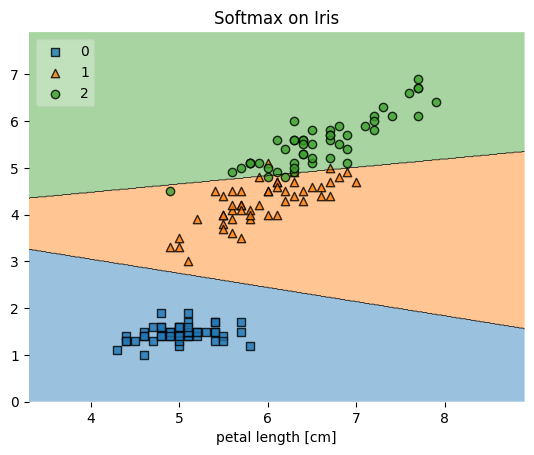

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df.iloc[:,0:2].values, df.iloc[:,-1].values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()